In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data= pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

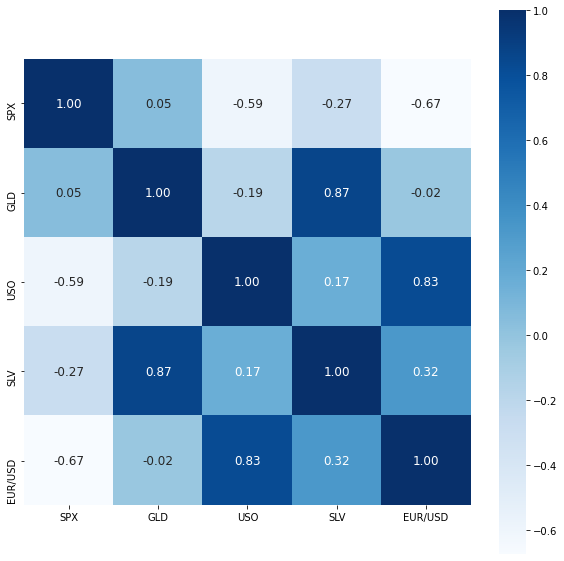

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(gold_data.corr(), fmt='.2f', square=True, cbar=True, annot=True, annot_kws={'size':12}, cmap='Blues')

In [19]:
# correlation values of  GOLD
correlation=gold_data.corr()
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

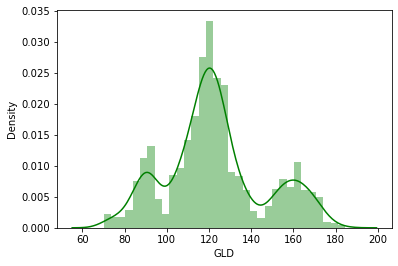

In [20]:
#checking distribution  of GOLD

sns.distplot(gold_data['GLD'], color='green')

In [21]:
# spitting the features and label

x= gold_data.drop(['GLD','Date' ], axis=1)
y= gold_data['GLD']

In [22]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
print('shape of Xtrain:', Xtrain.shape)
print('shape of Ytrain:', Ytrain.shape)
print('shape of Xtest:', Xtest.shape)
print('shape of Ytest:', Ytest.shape)

shape of Xtrain: (1832, 4)
shape of Ytrain: (1832,)
shape of Xtest: (458, 4)
shape of Ytest: (458,)


In [24]:
model= RandomForestRegressor()
model.fit(Xtrain, Ytrain)

RandomForestRegressor()

In [25]:
ytest_pred= model.predict(Xtest)

In [28]:
#R2 Score
Error_score=metrics.r2_score(Ytest, ytest_pred)
MAE= metrics.mean_absolute_error(Ytest, ytest_pred)
print('The R2 score Error is : ', Error_score)
print('The Mean Absolute Error is :', MAE)

The R2 score Error is :  0.9889683709897421
The Mean Absolute Error is : 1.3404337168122253


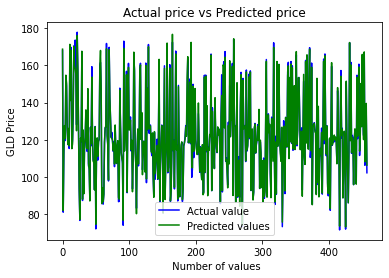

In [32]:
# Compare the Actual values to predicted values

Ytest= list(Ytest)
plt.plot(Ytest, color='blue', label= 'Actual value')
plt.plot(ytest_pred, color='green', label= 'Predicted values')
plt.ylabel('GLD Price')
plt.xlabel(' Number of values')
plt.title('Actual price vs Predicted price')
plt.legend()
plt.show()